In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

# Create data

<Axes: >

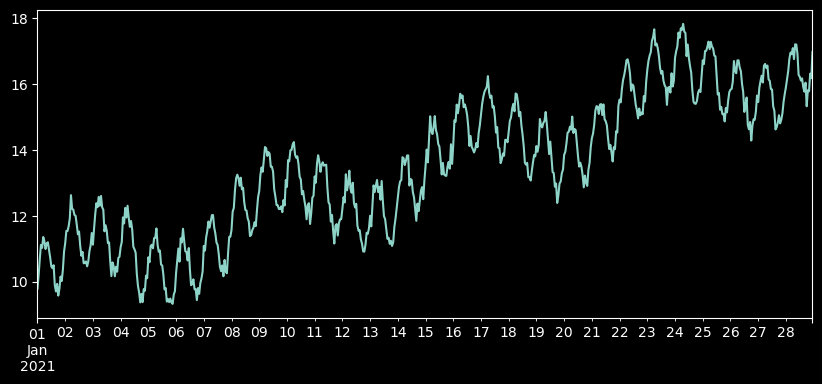

In [14]:
nPts = 24*7*4*3

period1 = 24
period2 = 24*7

x = np.arange(nPts)
y = 0.25*x/24 + \
    np.sin( 2*np.pi*x/period1 ) + \
    np.sin( 2*np.pi*x/period2 ) + \
    np.random.normal(0,0.2,nPts) + 10

idX = pd.date_range(start='01/01/2021', periods=nPts, freq='h')

y = pd.Series(y, index=idX)

# diff
#y = y.diff().fillna(0)

y[:24*7*4].plot(figsize=(10,4))

## Engineer datetime features

In [15]:
X = pd.DataFrame(index=idX)

X['hour']       = idX.hour
X['dayofweek']  = idX.dayofweek
X['dayofmonth'] = idX.day
X['week']       = idX.isocalendar().week.astype(int)
X['month']      = idX.month
X['quarter']    = idX.quarter
X['year']       = idX.year

from numpy import pi

for i in range(1,24//2+1):
    X[f'hour_sin{i}'] = np.sin(i*2*pi*X.hour/24)
    X[f'hour_cos{i}'] = np.cos(i*2*pi*X.hour/24)
# end

for i in range(1,7//2):
    X[f'dayofweek_sin{i}'] = np.sin(i*2*pi*X.dayofweek/7)
    X[f'dayofweek_cos{i}'] = np.cos(i*2*pi*X.dayofweek/7)
# end

for i in range(1,31//2):
    X[f'dayofmonth_sin{i}'] = np.sin(i*2*pi*X.dayofmonth/31)
    X[f'dayofmonth_cos{i}'] = np.cos(i*2*pi*X.dayofmonth/31)
# end

for i in range(1,53//2):
    X[f'year_sin{i}'] = np.sin(i*2*pi*X.year/53)
    X[f'year_cos{i}'] = np.cos(i*2*pi*X.year/53)
# end

for i in range(1,12//2+1):
    X[f'month_sin{i}'] = np.sin(i*2*pi*X.month/12)
    X[f'month_cos{i}'] = np.cos(i*2*pi*X.month/12)
# end

for i in range(1,4//2+1):
    X[f'quarter_sin{i}'] = np.sin(i*2*pi*X.quarter/4)
    X[f'quarter_cos{i}'] = np.cos(i*2*pi*X.quarter/4)
# end

X

,hour,dayofweek,dayofmonth,week,month,quarter,year,hour_sin1,hour_cos1,hour_sin2,hour_cos2,hour_sin3,hour_cos3,hour_sin4,hour_cos4,hour_sin5,hour_cos5,hour_sin6,hour_cos6,hour_sin7,hour_cos7,hour_sin8,hour_cos8,hour_sin9,hour_cos9,hour_sin10,hour_cos10,hour_sin11,hour_cos11,hour_sin12,hour_cos12,dayofweek_sin1,dayofweek_cos1,dayofweek_sin2,dayofweek_cos2,dayofmonth_sin1,dayofmonth_cos1,dayofmonth_sin2,dayofmonth_cos2,dayofmonth_sin3,dayofmonth_cos3,dayofmonth_sin4,dayofmonth_cos4,dayofmonth_sin5,dayofmonth_cos5,dayofmonth_sin6,dayofmonth_cos6,dayofmonth_sin7,dayofmonth_cos7,dayofmonth_sin8,...,year_sin9,year_cos9,year_sin10,year_cos10,year_sin11,year_cos11,year_sin12,year_cos12,year_sin13,year_cos13,year_sin14,year_cos14,year_sin15,year_cos15,year_sin16,year_cos16,year_sin17,year_cos17,year_sin18,year_cos18,year_sin19,year_cos19,year_sin20,year_cos20,year_sin21,year_cos21,year_sin22,year_cos22,year_sin23,year_cos23,year_sin24,year_cos24,year_sin25,year_cos25,month_sin1,month_cos1,month_sin2,month_cos2,month_sin3,month_cos3,month_sin4,month_cos4,month_sin5,month_cos5,month_sin6,month_cos6,quarter_sin1,quarter_cos1,quarter_sin2,quarter_cos2
2021-01-01 00:00:00,0,4,1,53,1,1,2021,0.000000,1.000000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000,1.000000,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,0.000000e+00,1.0,-0.433884,-0.900969,0.781831,0.62349,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,0.848644,0.528964,0.937752,0.347305,0.988468,0.151428,0.998717,...,0.92669,0.375828,0.902798,-0.430065,0.292057,-0.956401,-0.508531,-0.861044,-0.978556,-0.205979,-0.812487,0.582979,-0.118273,0.992981,0.652822,0.757511,0.999561,0.029633,0.696551,-0.717507,-0.059241,-0.998244,-0.776524,-0.630088,-0.98904,0.147647,-0.558647,0.829406,0.234886,0.972023,0.875735,0.482792,0.947326,-0.32027,0.5,8.660254e-01,8.660254e-01,0.5,1.0,6.123234e-17,8.660254e-01,-0.5,0.5,-8.660254e-01,1.224647e-16,-1.0,1.0,6.123234e-17,1.224647e-16,-1.0
2021-01-01 01:00:00,1,4,1,53,1,1,2021,0.258819,0.965926,0.500000,8.660254e-01,7.071068e-01,7.071068e-01,8.660254e-01,0.5,0.965926,0.258819,1.000000e+00,6.123234e-17,0.965926,-0.258819,8.660254e-01,-0.5,7.071068e-01,-7.071068e-01,0.500000,-8.660254e-01,0.258819,-0.965926,1.224647e-16,-1.0,-0.433884,-0.900969,0.781831,0.62349,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,0.848644,0.528964,0.937752,0.347305,0.988468,0.151428,0.998717,...,0.92669,0.375828,0.902798,-0.430065,0.292057,-0.956401,-0.508531,-0.861044,-0.978556,-0.205979,-0.812487,0.582979,-0.118273,0.992981,0.652822,0.757511,0.999561,0.029633,0.696551,-0.717507,-0.059241,-0.998244,-0.776524,-0.630088,-0.98904,0.147647,-0.558647,0.829406,0.234886,0.972023,0.875735,0.482792,0.947326,-0.32027,0.5,8.660254e-01,8.660254e-01,0.5,1.0,6.123234e-17,8.660254e-01,-0.5,0.5,-8.660254e-01,1.224647e-16,-1.0,1.0,6.123234e-17,1.224647e-16,-1.0
2021-01-01 02:00:00,2,4,1,53,1,1,2021,0.500000,0.866025,0.866025,5.000000e-01,1.000000e+00,6.123234e-17,8.660254e-01,-0.5,0.500000,-0.866025,1.224647e-16,-1.000000e+00,-0.500000,-0.866025,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16,-0.866025,5.000000e-01,-0.500000,0.866025,-2.449294e-16,1.0,-0.433884,-0.900969,0.781831,0.62349,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,0.848644,0.528964,0.937752,0.347305,0.988468,0.151428,0.998717,...,0.92669,0.375828,0.902798,-0.430065,0.292057,-0.956401,-0.508531,-0.861044,-0.978556,-0.205979,-0.812487,0.582979,-0.118273,0.992981,0.652822,0.757511,0.999561,0.029633,0.696551,-0.717507,-0.059241,-0.998244,-0.776524,-0.630088,-0.98904,0.147647,-0.558647,0.829406,0.234886,0.972023,0.875735,0.482792,0.947326,-0.32027,0.5,8.660254e-01,8.660254e-01,0.5,1.0,6.123234e-17,8.660254e-01,-0.5,0.5,-8.660254e-01,1.224647e-16,-1.0,1.0,6.123234e-17,1.224647e-16,-1.0
2021-01-01 03:00:00,3,4,1,53,1,1,2021,0.707107,0.707107,1.000000,6.1232

# Modeling

## Time series train / test split

1512


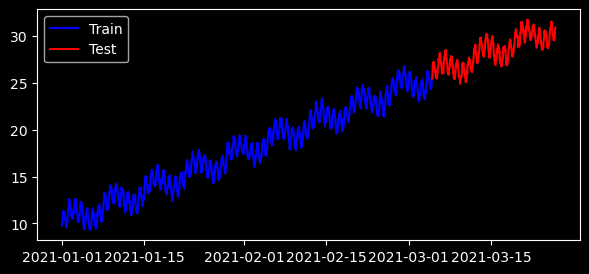

In [19]:
train_frac = 0.75

idx_split = int(np.round((X.shape[0] * train_frac)))
print(idx_split)

X_train = X.iloc[:idx_split,:]
y_train = y[:idx_split]

X_test  = X.iloc[idx_split:,:]
y_test  = y[idx_split:]

plt.figure(figsize=(7,3))
plt.plot( y_train, 'b', label='Train' );
plt.plot( y_test, 'r', label='Test' );
plt.legend()

## Train models

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    RandomForestRegressor(n_estimators=100, max_depth=5),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
]

LinearRegression()
r2_train:   0.99691
r2_test:    0.97506
rmse_train: 0.25558
rmse_test:  0.25714


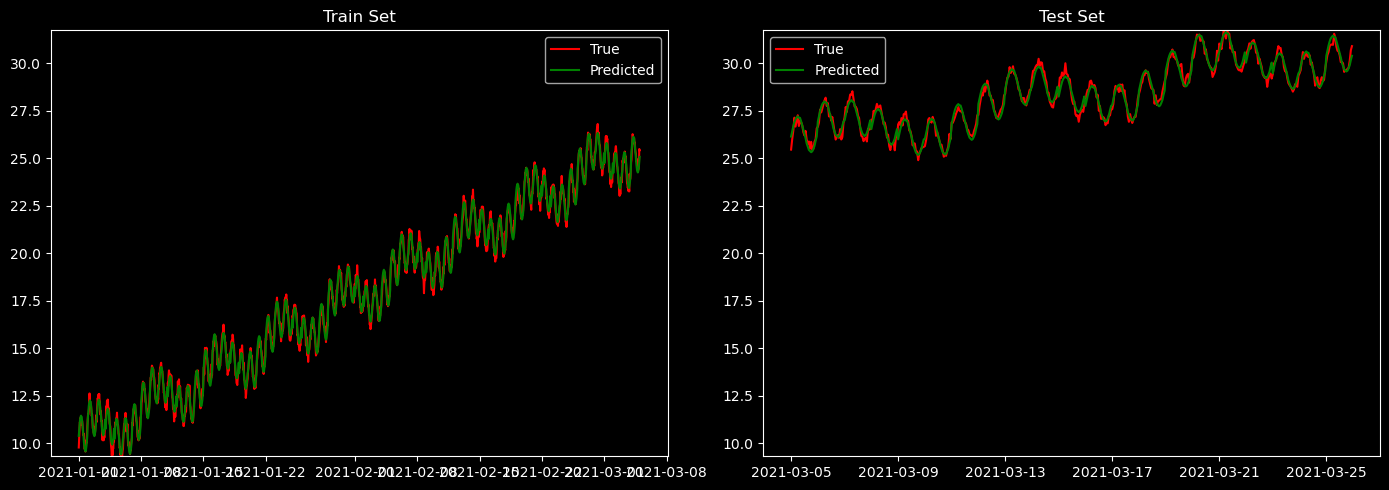


KNeighborsRegressor()
r2_train:   0.99622
r2_test:    -16.196
rmse_train: 0.28272
rmse_test:  6.7521


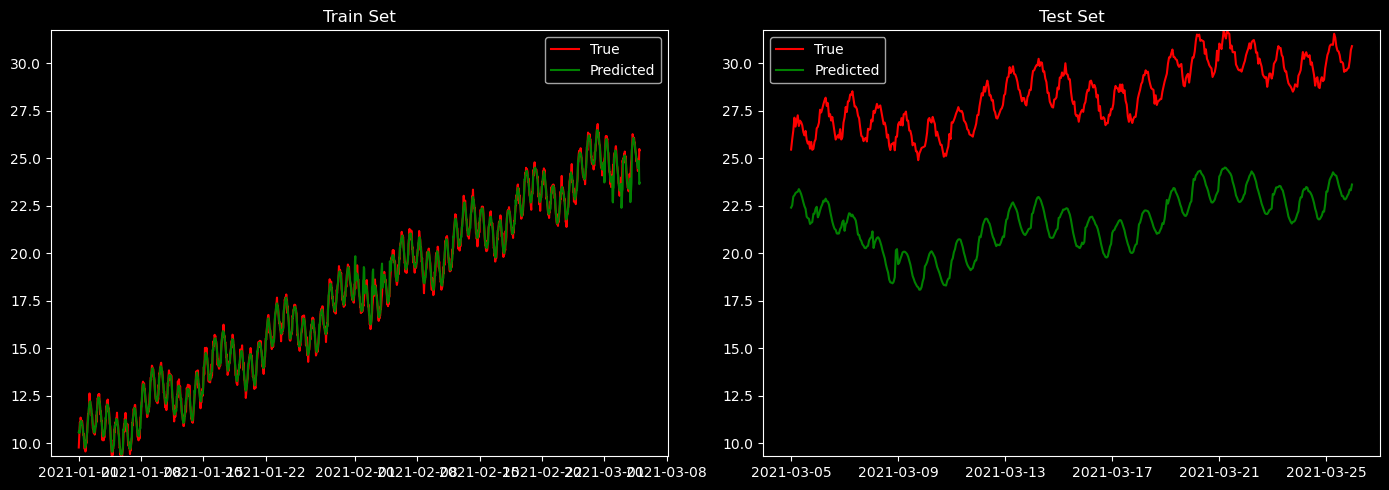


RandomForestRegressor(max_depth=5)
r2_train:   0.99173
r2_test:    -13.339
rmse_train: 0.41815
rmse_test:  6.1657


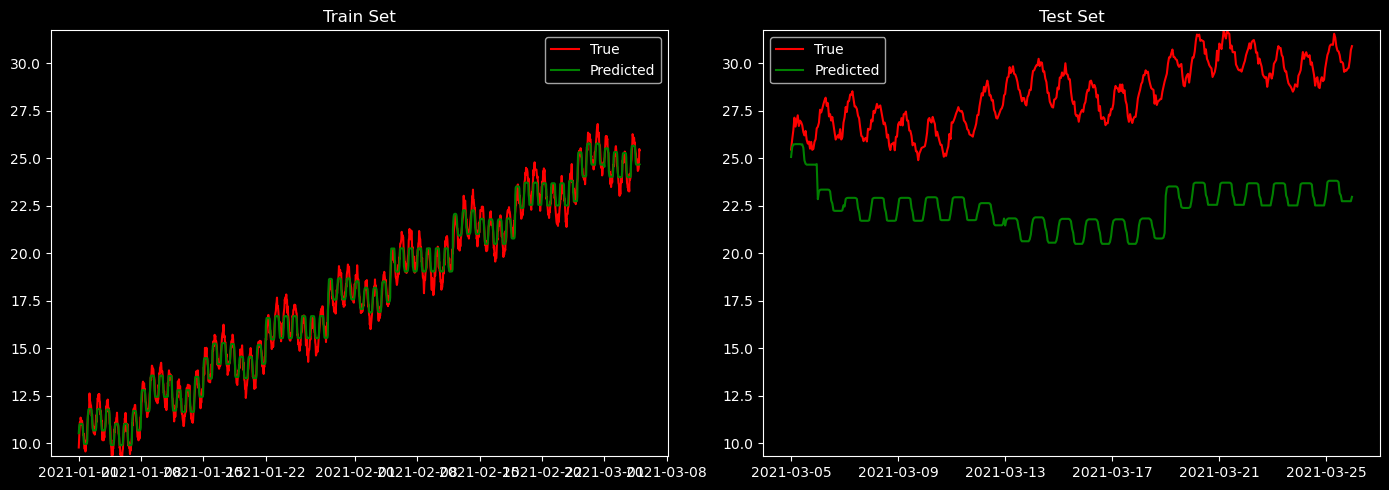


RandomForestRegressor(max_depth=10)
r2_train:   0.99925
r2_test:    -13.314
rmse_train: 0.12586
rmse_test:  6.1603


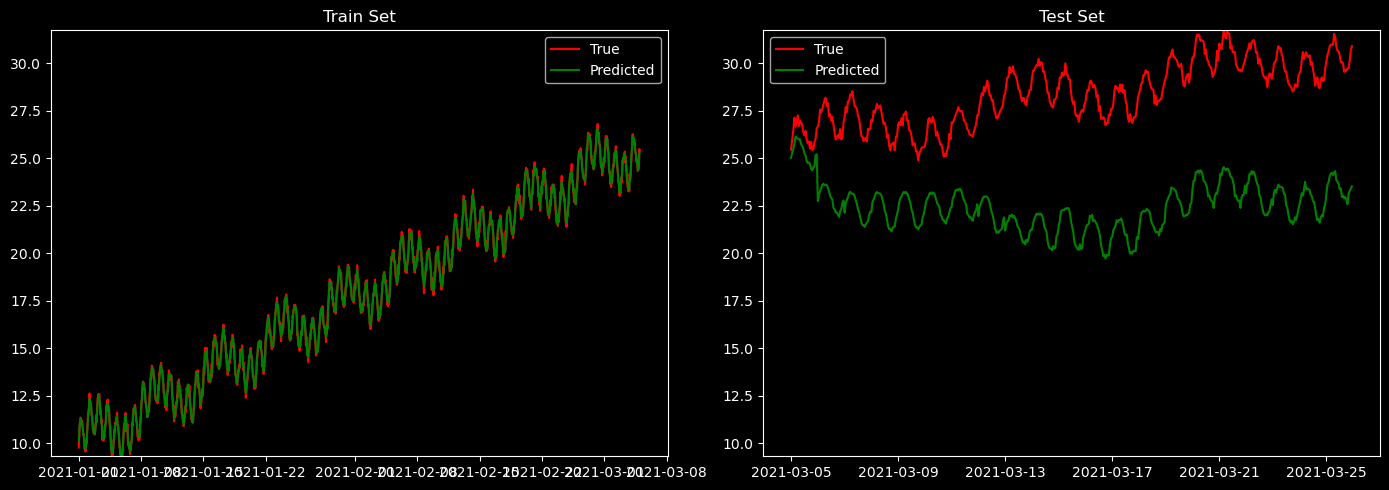


GradientBoostingRegressor(max_depth=2)
r2_train:   0.99678
r2_test:    -3.9136
rmse_train: 0.26098
rmse_test:  3.6093


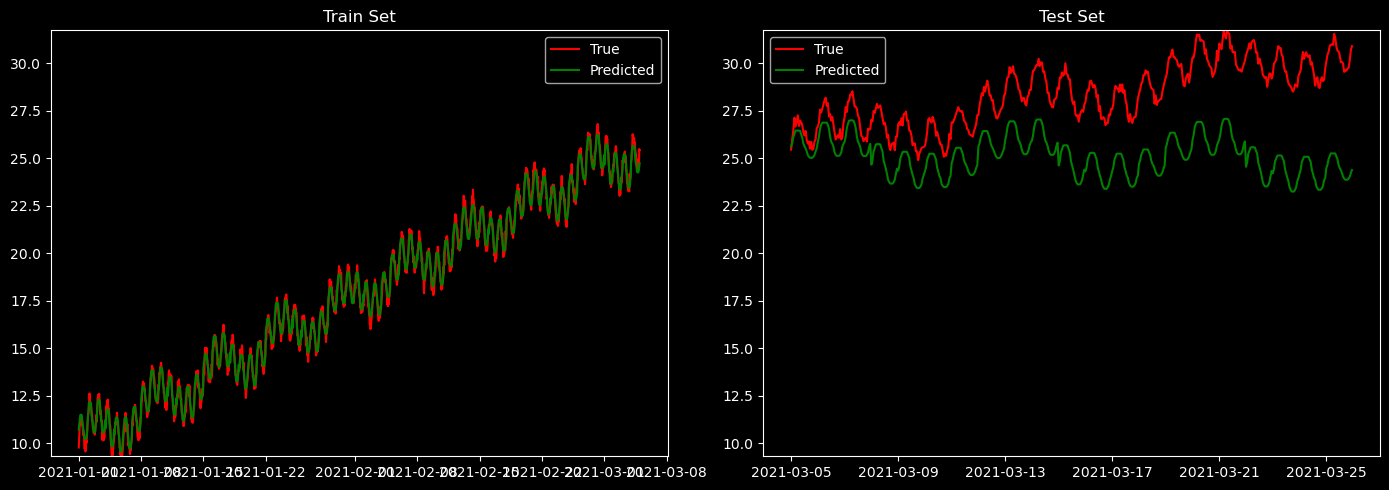


GradientBoostingRegressor()
r2_train:   0.99811
r2_test:    -9.6152
rmse_train: 0.19987
rmse_test:  5.305


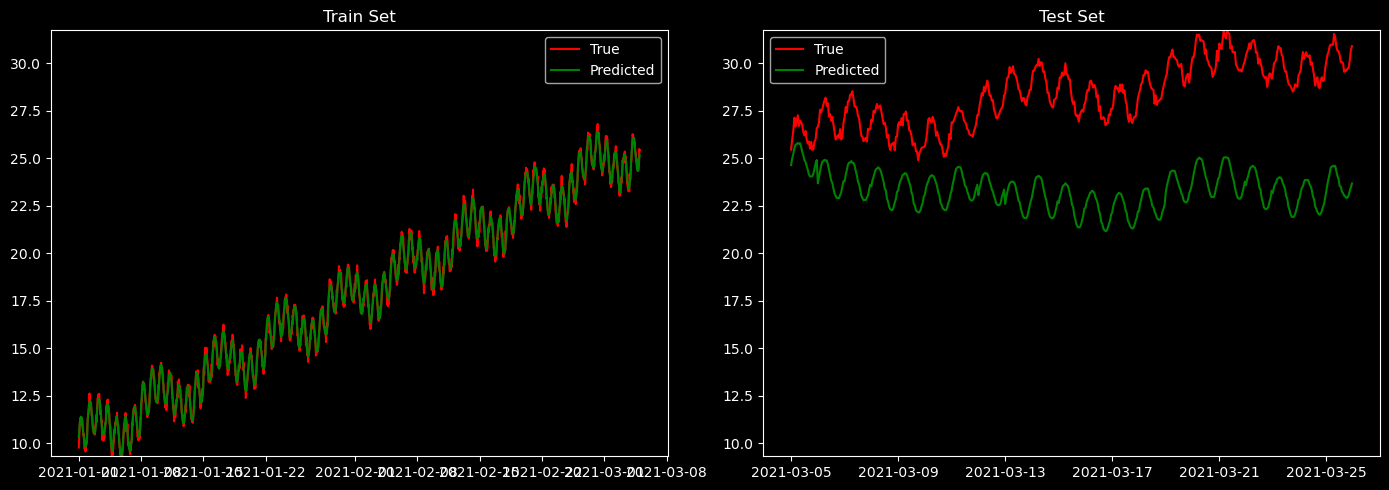


GradientBoostingRegressor(max_depth=5)
r2_train:   0.99925
r2_test:    -12.936
rmse_train: 0.12582
rmse_test:  6.0783


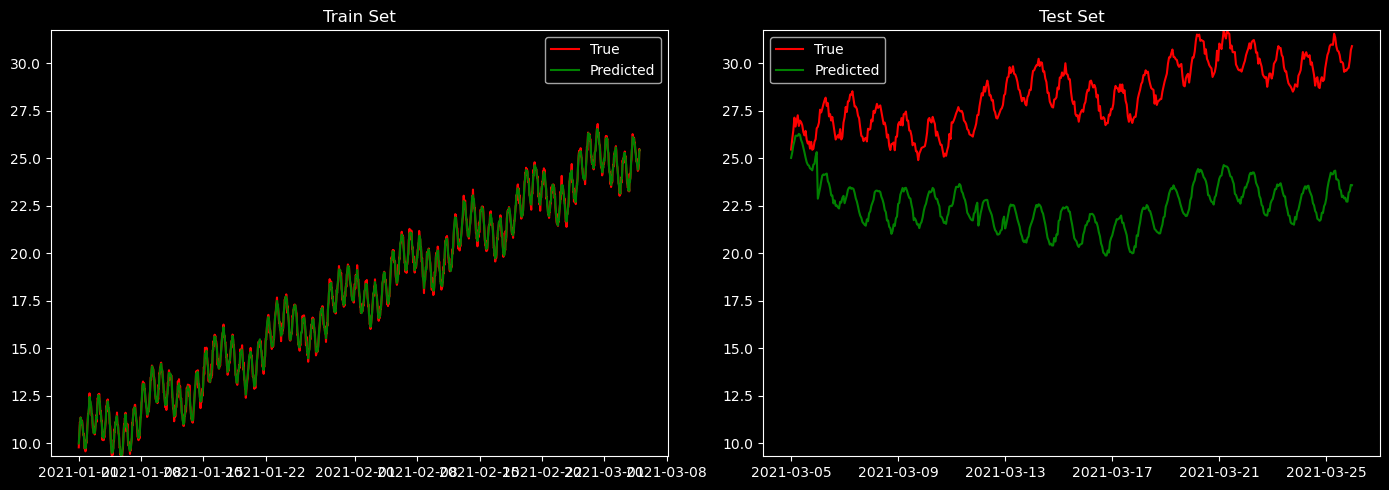

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

for m in models:
    m.fit(X_train, y_train)
    
    y_train_pred = m.predict(X_train)
    y_test_pred  = m.predict(X_test)
    
    print(m)
    
    r2_train = r2_score(y_train, y_train_pred)
    print(f'r2_train:   {r2_train:.5}')

    r2_test = r2_score(y_test, y_test_pred)
    print(f'r2_test:    {r2_test:.5}')
    
    rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
    print(f'rmse_train: {rmse_train:.5}')

    rmse_test = mean_squared_error(y_test, y_test_pred)**0.5
    print(f'rmse_test:  {rmse_test:.5}')
    
    y_train_pred = pd.Series(y_train_pred, index=y_train.index)
    y_test_pred  = pd.Series(y_test_pred, index=y_test.index)

    # Calculate global y-axis limits
    y_min = min(y_train.min(), y_train_pred.min(), y_test.min(), y_test_pred.min())
    y_max = max(y_train.max(), y_train_pred.max(), y_test.max(), y_test_pred.max())

    # Plot train and test side by side with shared y limits
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(y_train, 'r', label='True')
    axs[0].plot(y_train_pred, 'g', label='Predicted')
    axs[0].set_title('Train Set')
    axs[0].set_ylim(y_min, y_max)
    axs[0].legend()

    axs[1].plot(y_test, 'r', label='True')
    axs[1].plot(y_test_pred, 'g', label='Predicted')
    axs[1].set_title('Test Set')
    axs[1].set_ylim(y_min, y_max)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    print()
# end
